In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [3]:
data = pd.read_csv("/home/jishnu/Desktop/ML-dataset/student_habits_performance.csv")

df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [6]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [7]:
df["parental_education_level"] = df["parental_education_level"].fillna(df["parental_education_level"].mode()[0])

In [8]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [9]:
c1 = df.select_dtypes(["int","float"])

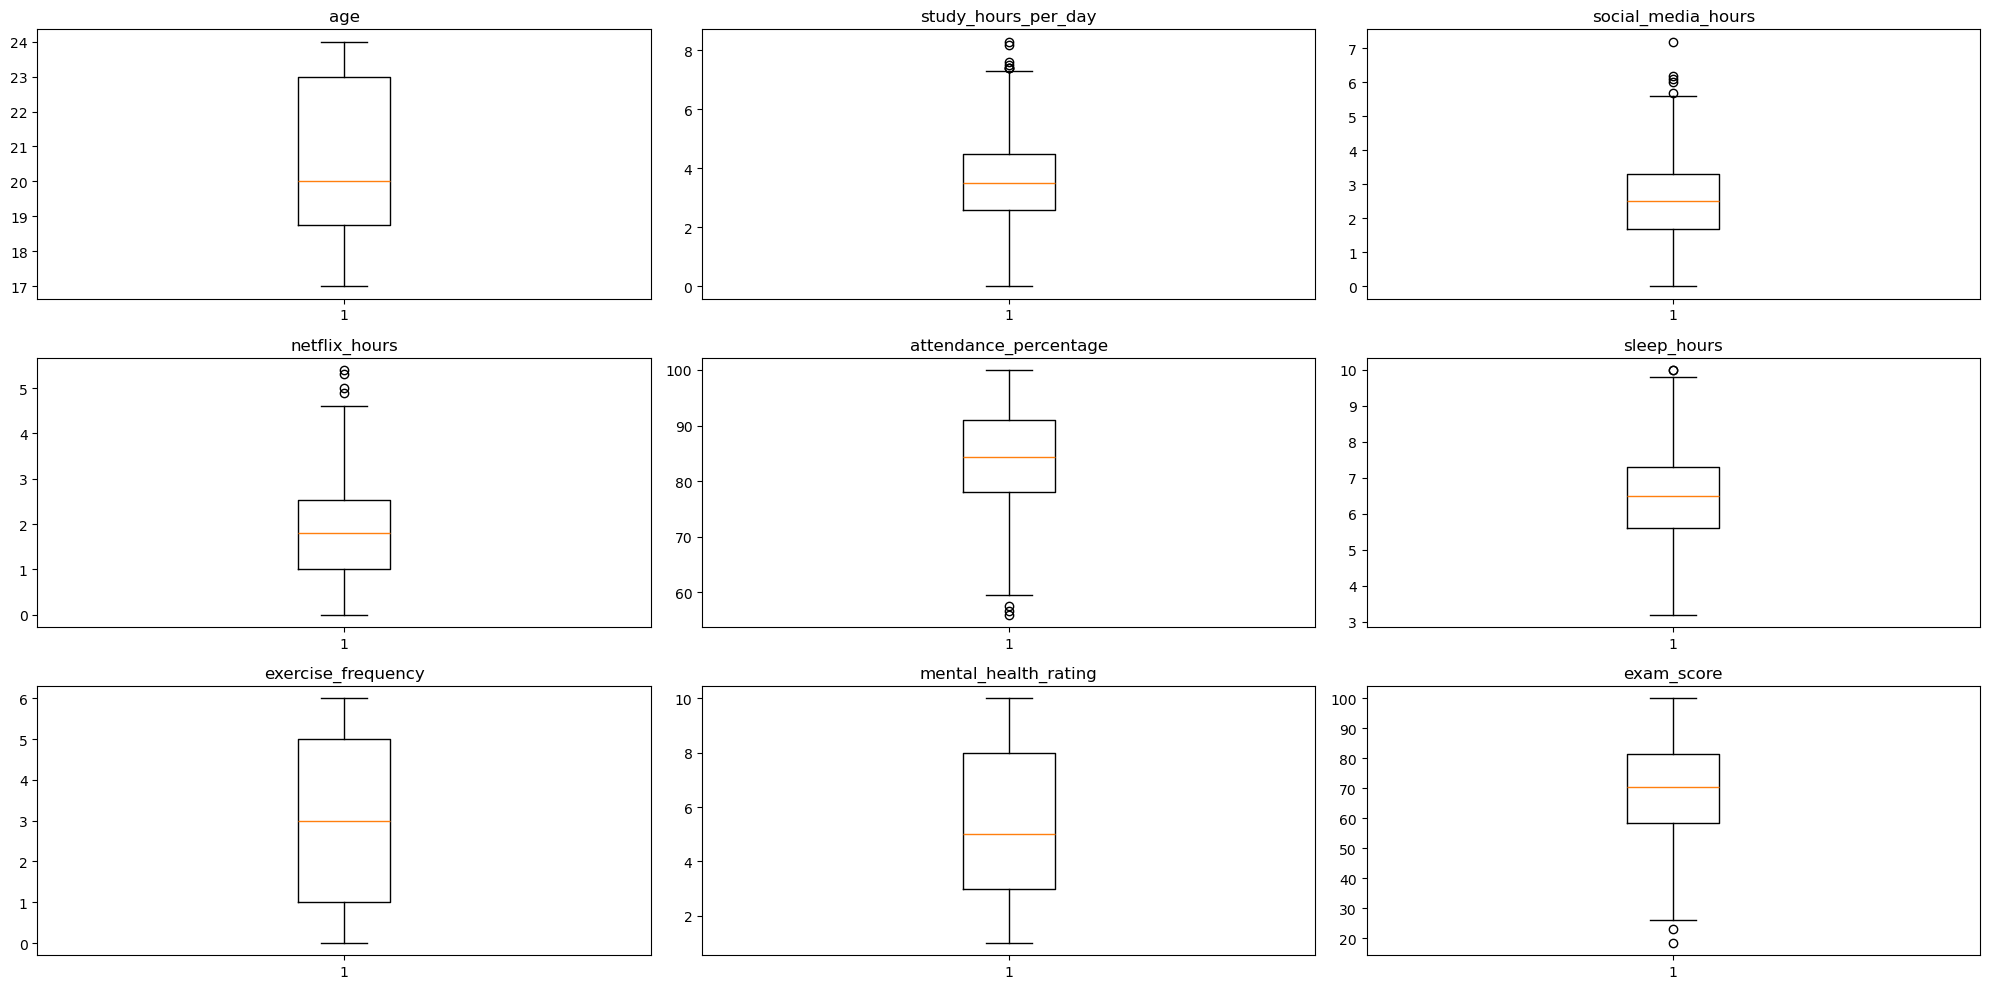

In [15]:
fig,axs = plt.subplots(3,3,figsize = (20,10))
axs = axs.flatten()

for i in range(9):
    axs[i].boxplot(df[c1.columns[i]])
    axs[i].set_title(c1.columns[i])
plt.tight_layout()
plt.show()

In [16]:
c2 = df.select_dtypes("object")

c2.shape

(1000, 7)

In [17]:
c2.head()

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
0,S1000,Female,No,Fair,Master,Average,Yes
1,S1001,Female,No,Good,High School,Average,No
2,S1002,Male,No,Poor,High School,Poor,No
3,S1003,Female,No,Poor,Master,Good,Yes
4,S1004,Female,No,Fair,Master,Good,No


In [18]:
c2.nunique()

student_id                       1000
gender                              3
part_time_job                       2
diet_quality                        3
parental_education_level            3
internet_quality                    3
extracurricular_participation       2
dtype: int64

In [20]:
df.drop("student_id",axis = 1,inplace = True)

In [23]:
le = LabelEncoder()

In [24]:
c3 = df.select_dtypes("object")

for i in c3.columns:
    df[i] = le.fit_transform(df[i])

In [25]:
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2
1,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0
2,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3
3,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8
4,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4


In [26]:
df.tail()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,21,0,2.6,0.5,1.6,0,77.0,7.5,0,2,1,1,6,1,76.1
996,17,0,2.9,1.0,2.4,1,86.0,6.8,2,1,1,0,6,1,65.9
997,20,1,3.0,2.6,1.3,0,61.9,6.5,1,5,0,1,9,1,64.4
998,24,1,5.4,4.1,1.1,1,100.0,7.6,0,0,0,0,1,0,69.7
999,19,0,4.3,2.9,1.9,0,89.4,7.1,1,2,0,0,8,0,74.9


In [27]:
c4 = ["age","study_hours_per_day","social_media_hours","netflix_hours","attendance_percentage","sleep_hours"]

mm = MinMaxScaler()

df[c4] = mm.fit_transform(df[c4])

In [28]:
df.describe()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.499714,0.561000,0.427723,0.347986,0.336981,0.215000,0.639357,0.480897,0.7480,3.042000,0.817000,0.771000,5.438000,0.318000,69.601500
std,0.329729,0.574987,0.176975,0.162836,0.199096,0.411028,0.213619,0.180350,0.7477,2.025423,0.695697,0.707856,2.847501,0.465932,16.888564
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.000000,0.000000,18.400000
25%,0.250000,0.000000,0.313253,0.236111,0.185185,0.000000,0.500000,0.352941,0.0000,1.000000,0.000000,0.000000,3.000000,0.000000,58.475000
50%,0.428571,1.000000,0.421687,0.347222,0.333333,0.000000,0.645455,0.485294,1.0000,3.000000,1.000000,1.000000,5.000000,0.000000,70.500000
75%,0.857143,1.000000,0.542169,0.458333,0.467593,0.000000,0.796023,0.602941,1.0000,5.000000,1.000000,1.000000,8.000000,1.000000,81.325000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0000,6.000000,2.000000,2.000000,10.000000,1.000000,100.000000


In [30]:
x = df.drop("exam_score", axis = 1)
y = df[["exam_score"]]

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [32]:
x_train

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
82,0.571429,0,0.313253,0.680556,0.000000,1,0.695455,0.455882,0,6,1,2,4,0
991,0.428571,1,0.722892,0.291667,0.555556,0,0.697727,0.279412,1,2,1,1,3,0
789,0.857143,1,0.409639,0.069444,0.074074,0,0.384091,0.691176,0,4,0,1,4,0
894,0.428571,1,0.180723,0.638889,0.129630,1,0.604545,0.558824,1,1,0,1,4,1
398,1.000000,1,0.686747,0.402778,0.314815,0,0.484091,0.470588,1,0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.714286,1,0.397590,0.055556,0.148148,0,0.620455,0.867647,1,6,1,1,4,1
270,0.714286,1,0.481928,0.444444,0.425926,1,0.922727,0.411765,1,4,1,1,3,1
860,0.428571,0,0.433735,0.541667,0.777778,0,1.000000,0.750000,2,1,1,2,8,1
435,1.000000,1,0.240964,0.000000,0.574074,0,0.402273,0.455882,1,6,1,0,3,1


In [33]:
y_train

,exam_score
82,60.2
991,85.3
789,78.0
894,45.4
398,69.1
...,...
106,82.3
270,63.0
860,65.6
435,58.3


In [34]:
x_test

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
521,0.857143,1,0.421687,0.291667,0.259259,0,0.595455,0.661765,0,1,1,1,3,0
737,0.571429,1,0.710843,0.638889,0.481481,1,1.000000,0.500000,0,0,1,0,1,1
740,0.857143,0,0.542169,0.333333,0.222222,1,0.700000,0.485294,2,3,1,0,4,1
660,1.000000,0,0.397590,0.305556,0.259259,0,0.752273,0.397059,1,2,1,1,9,1
411,1.000000,1,0.192771,0.111111,0.592593,1,0.159091,0.705882,1,3,1,1,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.857143,0,0.650602,0.333333,0.462963,0,0.902273,0.411765,0,2,1,1,2,0
430,0.000000,1,0.228916,0.555556,0.555556,0,0.968182,0.441176,2,0,0,0,7,1
77,0.428571,0,0.325301,0.194444,0.074074,0,0.604545,0.676471,0,1,0,2,1,0
84,0.857143,0,0.301205,0.611111,0.296296,0,0.645455,0.529412,0,5,0,0,4,0


In [35]:
y_test

,exam_score
521,64.2
737,72.7
740,79.0
660,79.5
411,58.2
...,...
109,77.5
430,35.7
77,57.2
84,51.3


In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model = lr.fit(x_train,y_train)

In [37]:
y_predict = model.predict(x_test)

In [38]:
y_predict

array([[ 66.63225827],
       [ 75.21458359],
       [ 77.49985803],
       [ 73.94685762],
       [ 61.54796102],
       [ 54.54016585],
       [ 76.09286442],
       [ 55.57755164],
       [ 41.50553853],
       [ 72.91426959],
       [ 40.94645886],
       [102.33309007],
       [ 58.48294675],
       [ 72.09430247],
       [ 36.00437965],
       [ 57.54445028],
       [ 73.48162202],
       [ 69.23167653],
       [ 66.08448094],
       [ 50.25149411],
       [ 56.2454191 ],
       [ 62.58953323],
       [ 51.03711236],
       [ 88.04466556],
       [ 69.44140227],
       [ 71.53988007],
       [ 68.97227847],
       [ 56.24693852],
       [ 69.87431213],
       [ 68.00875866],
       [ 65.14420027],
       [ 78.87346323],
       [ 64.29841291],
       [ 81.22179136],
       [ 60.84517705],
       [ 51.02711193],
       [ 70.45385192],
       [ 58.89163915],
       [ 65.10241399],
       [ 97.57165933],
       [ 50.13540466],
       [ 85.78526281],
       [ 67.50387529],
       [ 64

In [39]:
y_test

,exam_score
521,64.2
737,72.7
740,79.0
660,79.5
411,58.2
...,...
109,77.5
430,35.7
77,57.2
84,51.3


In [44]:
from sklearn.metrics import r2_score

print(f"r2score = {r2_score(y_test,y_predict)}")

r2score = 0.8923075218470532


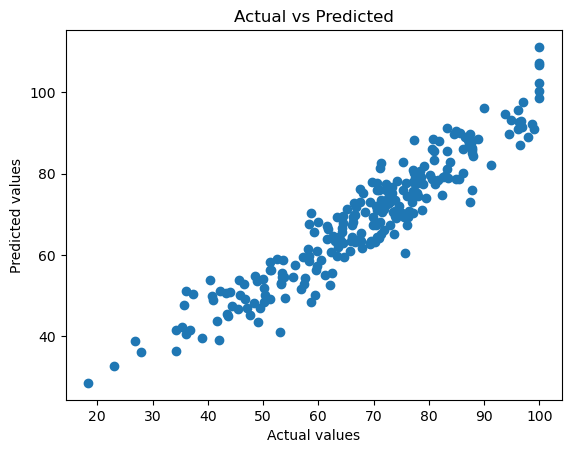

In [45]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")
plt.show()
